In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($filterTypes_0:[SecurityTypeEnum!]!,$limit_1:[SecurityLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenSecurities25Yc4F:screenSecurities(filterTypes:$filterTypes_0,filterCategory:[],limit:$limit_1,first:100) {edges {node {symbol}}}}'
variables = {'filterTypes_0': ['EQUITY'], 'limit_1':[{'type':'MARKET_CAP','min':40000000000,'inclusive':True},{'type':'DIVIDEND_YIELD','min':3,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
symbols = [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['_screenSecurities25Yc4F']['edges']]

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-25 to 2019-06-25 - 83'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
KO,64,3.961007,1.639176,2.314785,3.383609
TRP,64,3.520554,1.816980,1.845858,2.850878
SO,64,2.950153,1.640281,1.696957,2.686291
UN,64,3.462042,2.160466,1.525308,3.523672
PSA,64,4.081012,3.371601,1.160975,4.410452
RELX,64,3.510729,3.710511,0.901240,7.548802
BCE,64,1.640666,1.821918,0.809037,4.290722
CCI,64,3.282312,4.584656,0.679581,5.888680
KMI,64,1.689118,2.452437,0.620791,5.044082


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['KO'] -0.8380631578837747 0.6 0.6767218606826366 2.314785018566411
['KO', 'TRP'] -1.2109538586634148 0.24591896489972997 0.6234487113472744 2.080321534910419
['KO', 'UN'] -1.278240630875534 -0.048922506262341514 0.6907281657343389 1.9200462903475315
['TRP', 'SO'] -1.4623686351875385 -0.24467801674399003 0.5537168749272446 1.771407493370793


['TRP', 'SO']

In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['TRP', 'SO'], sr=0)

['TRP', 'SO'] 0.3090388581832546 -0.24467801674399003 0.5537168749272446 1.771407493370793
['TRP', 'SO', 'KO', 'UN'] -0.11908427324520154 0.05869320642400666 0.6222225203307918 1.8457268918591623


['TRP', 'SO', 'KO', 'UN']

In [7]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 6, ['TRP', 'SO', 'KO', 'UN'], sr=0)

['TRP', 'SO', 'KO', 'UN'] -0.11908427324520154 0.05869320642400666 0.6222225203307918 1.8457268918591623
['TRP', 'SO', 'KO', 'UN', 'PSA'] -0.38628016939051957 0.13952375289428845 0.6741960777151922 1.708776604195966
['TRP', 'SO', 'KO', 'UN', 'PSA', 'RELX'] -0.6954076670662214 0.09113552561125247 0.8134568073225262 1.574187201106371
['TRP', 'SO', 'KO', 'UN', 'PSA', 'BCE'] -0.7152709868856576 0.17987487036041644 0.704854142753926 1.5588200395627025
['TRP', 'SO', 'KO', 'UN', 'PSA', 'RDS-A'] -0.7395869635542659 0.1418700977181067 0.7185429387276275 1.4918534950554028


['TRP', 'SO', 'KO', 'UN', 'PSA', 'RDS-A']

In [9]:
quote.setup_mask(['TRP', 'SO', 'KO', 'UN', 'RDS-A'])
quote.find_optimal_ratio(21, 3)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 TRP      0.353869
 SO       0.341672
 KO       0.086028
 UN       0.200576
 RDS-A    0.017854
 dtype: float64, 3.308, 0.9313)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,64.0,3.293941,0.928462,1.026562,2.701047,3.180160,3.962526,5.764610,3.368232,1.737624
KO,64.0,3.961007,1.639176,0.387284,2.900776,3.902778,4.731334,8.396620,2.314785,3.383609
TRP,64.0,3.520554,1.816980,0.611744,1.880627,3.428735,4.579192,7.343365,1.845858,2.850878
SO,64.0,2.950153,1.640281,-0.171328,1.765379,3.023435,3.990063,6.115392,1.696957,2.686291
UN,64.0,3.462042,2.160466,0.278938,1.745810,3.067760,4.474362,8.559653,1.525308,3.523672
RDS-A,64.0,1.063918,2.203260,-3.966320,-0.204851,0.774632,2.103619,7.401331,0.407238,4.701386


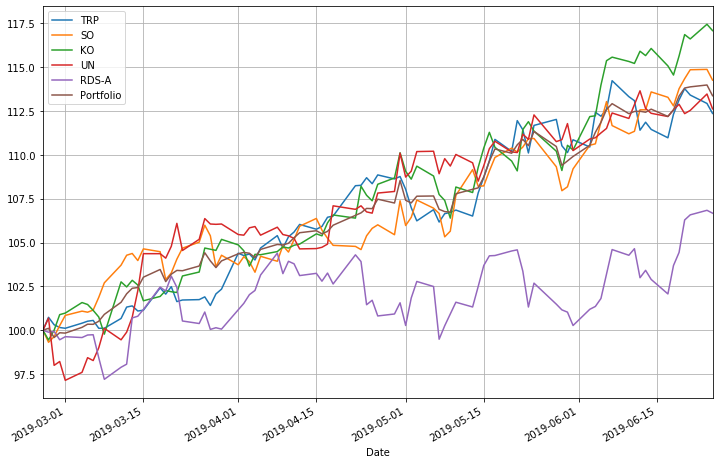

In [10]:
%pylab inline
quote.setup_mask(['TRP', 'SO', 'KO', 'UN', 'RDS-A'])
quote.graph(21, {'TRP': .35, 'SO': .34, 'KO': .09, 'UN': .20, 'RDS-A': .02})